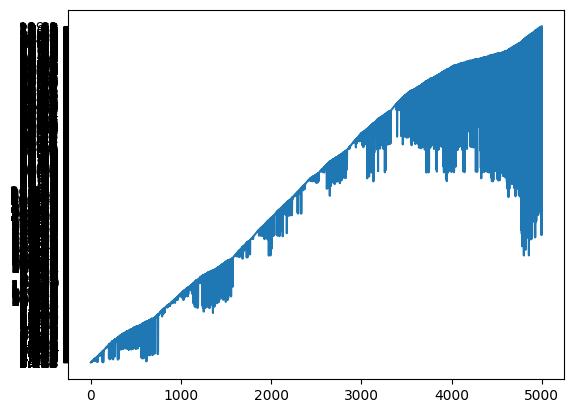

In [1]:
import torch, pywt, csv, numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import reader1 as rd
import utilerias as utls
from NARNN import NARNN 

# Abrir el archivo CSV en modo lectura
#Grupo Financiero Inbursa
cierre = rd.leer_archivo('cierre.csv')

x = np.arange(1, 5000)

# Crear un gráfico de línea con los valores de x, y
plt.plot(x, cierre)

# Mostrar el gráfico
plt.show()

In [2]:
def take(rec, take=0):
    rec_len = len(rec)
    if take > 0 and take < rec_len:
        left_bound = right_bound = (rec_len-take) // 2
        if (rec_len-take) % 2:
            # right_bound must never be zero for indexing to work
            right_bound = right_bound + 1

        return rec[left_bound:-right_bound] 
    
import pywt
data = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
(cA3, cD3, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'smooth', level = 3)
n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
print(len(pywt.upcoef('a', cA3, 'bior3.5' , level = 3)))
print(len(pywt.upcoef('d', cD3, 'bior3.5' , level = 3)))
print(len(pywt.upcoef('d', cD2, 'bior3.5', level = 2)))
print(len(pywt.upcoef('d', cD1, 'bior3.5')))

A2 = pywt.upcoef('a', cA3, 'bior3.5' , level = 3, take = 34) + pywt.upcoef('d', cD3, 'bior3.5' , level = 3, take=34)
A1 = take(A2, take = 24) + pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 24)
print(A1)
print(pywt.upcoef('d', cD1, 'bior3.5', take = 20))
final = take(A1, take = 20) + pywt.upcoef('d', cD1, 'bior3.5', take = 20)
print(final)

166
166
82
40
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25.]
[-7.35980840e-17 -8.95443355e-17  6.35550121e-17  2.28690713e-16
 -2.34133905e-16 -6.88448744e-17  5.88018025e-17  1.48806126e-16
 -1.78475354e-16  3.33031330e-16 -2.10367857e-16 -5.52598947e-16
  4.99240336e-16  4.33002061e-16 -5.17026540e-16  1.61302467e-16
  9.07709703e-17 -7.28621032e-16  8.43924697e-16 -2.15887713e-16]
[ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21.
 22. 23.]


C:\Users\maliera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [3]:
data = list(range(1,79)) #data = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40]
(cA1, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 1)
n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
print(len(pywt.upcoef('a', cA1, 'bior3.5')))
print(len(pywt.upcoef('d', cD1, 'bior3.5')))

print(pywt.upcoef('a', cA1, 'bior3.5', take = 78))
print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
final = pywt.upcoef('a', cA1, 'bior3.5', take = 78)  + pywt.upcoef('d', cD1, 'bior3.5', take = 78)
print(final)

98
98
[ 1.17089844  2.01269531  2.95263672  3.99072266  5.00732422  6.00244141
  7.          8.          9.         10.         11.         12.
 13.         14.         15.         16.         17.         18.
 19.         20.         21.         22.         23.         24.
 25.         26.         27.         28.         29.         30.
 31.         32.         33.         34.         35.         36.
 37.         38.         39.         40.         41.         42.
 43.         44.         45.         46.         47.         48.
 49.         50.         51.         52.         53.         54.
 55.         56.         57.         58.         59.         60.
 61.         62.         63.         64.         65.         66.
 67.         68.         69.         70.         71.         72.
 72.99755859 73.99267578 75.00927734 76.04736328 76.98730469 77.82910156]
[-1.70898438e-01 -1.26953125e-02  4.73632813e-02  9.27734375e-03
 -7.32421875e-03 -2.44140625e-03  5.88018025e-17  1.48806126e-16
 -

138
138
98


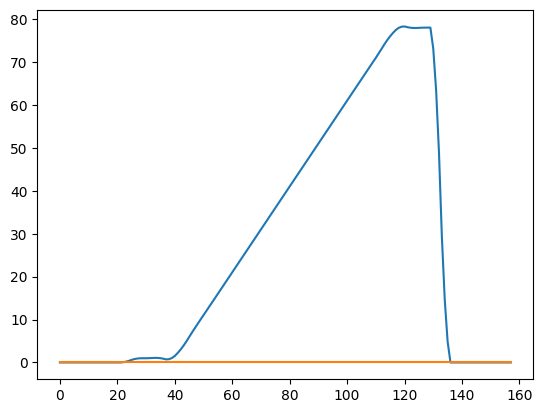

In [12]:
import random
data = list(range(1,79)) #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40]
#data = [random.uniform(1, 100) for _ in range(78)]
#rint(data)
(cA2, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 2)
n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
print(len(pywt.upcoef('a', cA2, 'bior3.5', level = 2)))
print(len(pywt.upcoef('d', cD2, 'bior3.5', level = 2)))
print(len(pywt.upcoef('d', cD1, 'bior3.5')))

#print(pywt.upcoef('a', cA2, 'bior3.5', take = 98))
#print(pywt.upcoef('d', cD2, 'bior3.5', take = 98))
#print("cD1: " + str(pywt.upcoef('d', cD1, 'bior3.5', take = 78)))
A1 = pywt.upcoef('a', cA2, 'bior3.5', level = 2, take = 98) + pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
#print(take(A1, take = 78))
#print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
final = take(A1, take = 78)  + pywt.upcoef('d', cD1, 'bior3.5', take = 78)
#print(final)

(cA11, cD11) = pywt.wavedec(pywt.upcoef('a', cA2, 'bior3.5', level = 2), 'bior3.5', 'constant', level=1)
A11 = pywt.upcoef('a', cA11, 'bior3.5')# , take = 138
D11 = pywt.upcoef('a', cD11, 'bior3.5')#, take = 138
#print(A11)
#print(D11)

plt.plot(range(len(A11)), A11)
plt.plot(range(len(D11)), D11)

# Mostrar el gráfico
plt.show()

# nivel 3

C:\Users\maliera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


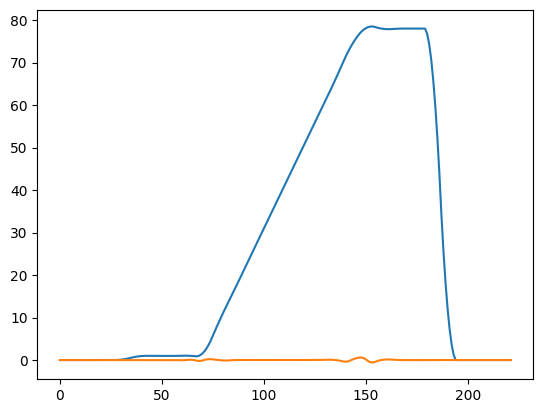

In [13]:
import random
data = list(range(1,79)) #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40]
#data = [random.uniform(1, 100) for _ in range(78)]
#print(data)
(cA3, cD3, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 3)
n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
#print(pywt.upcoef('a', cA3, 'bior3.5', level = 3))
A3 = pywt.upcoef('a', cA3, 'bior3.5', level = 3)
#print(pywt.upcoef('d', cD3, 'bior3.5', level = 3))
D3 = pywt.upcoef('d', cD3, 'bior3.5', level = 3)
# print(len(pywt.upcoef('d', cD2, 'bior3.5', level = 2)))
# print(len(pywt.upcoef('d', cD1, 'bior3.5')))

#print(pywt.upcoef('a', cA2, 'bior3.5', take = 98))
#print(pywt.upcoef('d', cD2, 'bior3.5', take = 98))
#print("cD1: " + str(pywt.upcoef('d', cD1, 'bior3.5', take = 78)))
A2 = pywt.upcoef('a', cA3, 'bior3.5', level = 3, take = 138) + pywt.upcoef('d', cD3, 'bior3.5', level = 3, take = 138)
#print(A2)
#print(take(A2, take = 98))
A1 = take(A2, take = 98) + pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
#print(take(A1, take = 78))
#print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
#print(pywt.upcoef('a', cA3, 'bior3.5', level = 3))
#print(pywt.upcoef('d', cD3, 'bior3.5', level = 3))
final = take(A1, take = 78)  + pywt.upcoef('d', cD1, 'bior3.5', take = 78)

plt.plot(range(len(A11)), A11)

plt.plot(range(len(A3)), A3)

plt.show()

plt.plot(range(len(D11)), D11)
plt.plot(range(len(D3)), D3)
plt.show()
#print(final)

In [6]:
data = list(range(1,79)) #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40]
#data = [random.uniform(1, 100) for _ in range(78)]
#print(data)
(cA5, cD5, cD4, cD3, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 5)
n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
print(len(pywt.upcoef('a', cA5, 'bior3.5', level = 5)))
print(len(pywt.upcoef('d', cD5, 'bior3.5', level = 5)))
print(len(pywt.upcoef('d', cD4, 'bior3.5', level = 4)))
print(len(pywt.upcoef('d', cD3, 'bior3.5', level = 3)))
print(len(pywt.upcoef('d', cD2, 'bior3.5', level = 2)))
print(len(pywt.upcoef('d', cD1, 'bior3.5')))

#print(pywt.upcoef('a', cA2, 'bior3.5', take = 98))
#print(pywt.upcoef('d', cD2, 'bior3.5', take = 98))
#print("cD1: " + str(pywt.upcoef('d', cD1, 'bior3.5', take = 78)))
A4 = pywt.upcoef('a', cA5, 'bior3.5', level = 5, take = 390) + pywt.upcoef('d', cD5, 'bior3.5', level = 5, take = 390)
A3 = take(A4, take = 222) + pywt.upcoef('d', cD4, 'bior3.5', level = 4, take = 222)
A2 = take(A3, take = 138) + pywt.upcoef('d', cD3, 'bior3.5', level = 3, take = 138)
A1 = take(A2, take = 98) + pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
print(take(A1, take = 78))
final = take(A1, take = 78)  + pywt.upcoef('d', cD1, 'bior3.5', take = 78)
print(final)

726
726
390
222
138
98
[14.23096081 15.57998799 16.86032012 18.07195719 19.14192022 20.0702092
 21.0009396  21.9341114  22.91100759 23.93162817 24.9688578  26.02269647
 27.06421994 28.0934282  29.11435172 30.1269905  31.13410458 32.13569395
 33.13152498 34.12159765 35.11167629 36.10176088 37.09184548 38.08193007
 39.07135762 40.06012813 41.04824159 42.03569801 43.02158944 44.00591587
 44.98867732 45.96987377 46.95101959 47.93211479 48.91315936 49.8941533
 50.87514725 51.85614119 52.83713514 53.81812908 54.81065743 55.81472019
 56.83031736 57.85744894 58.8959192  59.94572816 61.00687581 62.07936215
 63.14880861 64.21521517 65.27858185 66.33890864 67.39923543 68.45956222
 69.51988901 70.5802158  71.57607304 72.50746074 73.37437292 74.1768096
 74.89646023 75.53332481 76.0871697  76.55799489 76.94604954 77.25133367
 77.47787774 77.62568174 77.80060108 78.00263577 78.20467046 78.40670515
 78.53488358 78.58920576 78.71378713 78.90862769 78.96774151 78.89112858]
[14.06006237 15.56729268 16.90

C:\Users\maliera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [7]:
import pywt
import pdb
import numpy as np

def wrcoef(X, coef_type, coeffs, wavename, level):
    N = np.array(X).size#se calcula el tamaño
    a, ds = coeffs[0], list(reversed(coeffs[1:]))

    if coef_type =='a':
        return pywt.upcoef('a', a, wavename, level=level)[:N]
    elif coef_type == 'd':
        return pywt.upcoef('d', ds[level-1], wavename, level=level)[:N]
    else:
        raise ValueError("Invalid coefficient type: {}".format(coef_type))



level = 4
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 203, 14, 15, 16, 17, 18, 19, 20]#[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
n = len(X)
coeffs = pywt.wavedec(X, 'db1', level=level)
N = np.array(X).size
a4 = pywt.upcoef('a', coeffs[0], 'db1' , level = 4)[:N]
d4 = pywt.upcoef('d', coeffs[1], 'db1' , level = 4)[:N] 
d3 = pywt.upcoef('d', coeffs[2], 'db1', level = 3)[:N] 
d2 = pywt.upcoef('d', coeffs[3], 'db1', level = 2)[:N] 
d1= pywt.upcoef('d', coeffs[4], 'db1')[:N]

r = pywt.upcoef('a', coeffs[0], 'db1' , level = 4)[:N] + pywt.upcoef('d', coeffs[1], 'db1' , level = 4)[:N] + pywt.upcoef('d', coeffs[2], 'db1', level = 3)[:N] + pywt.upcoef('d', coeffs[3], 'db1', level = 2)[:N] + pywt.upcoef('d', coeffs[4], 'db1')[:N]

A4 = wrcoef(X, 'a', coeffs, 'db1', level)
D4 = wrcoef(X, 'd', coeffs, 'db1', level)
D3 = wrcoef(X, 'd', coeffs, 'db1', 3)
D2 = wrcoef(X, 'd', coeffs, 'db1', 2)
D1 = wrcoef(X, 'd', coeffs, 'db1', 1)

#print(D1)
#print(d1)
print(r)
print (A4 + D4 + D3 + D2 + D1)
print (a4 + d4 + d3 + d2 + d1)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12. 203.  14.
  15.  16.  17.  18.  19.  20.]
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12. 203.  14.
  15.  16.  17.  18.  19.  20.]
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12. 203.  14.
  15.  16.  17.  18.  19.  20.]


In [8]:
a = [4,4,3,2,1]
print(list(reversed(a[1:])))

[1, 2, 3, 4]


La magnitud de los coeficientes generados a partir de la DFT se refieren a la parte real de la evaluacion DFT(n) donde n se refiere a cada una de las frecuencias y f[k] es un punto en la serie de tiempo:

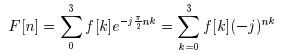

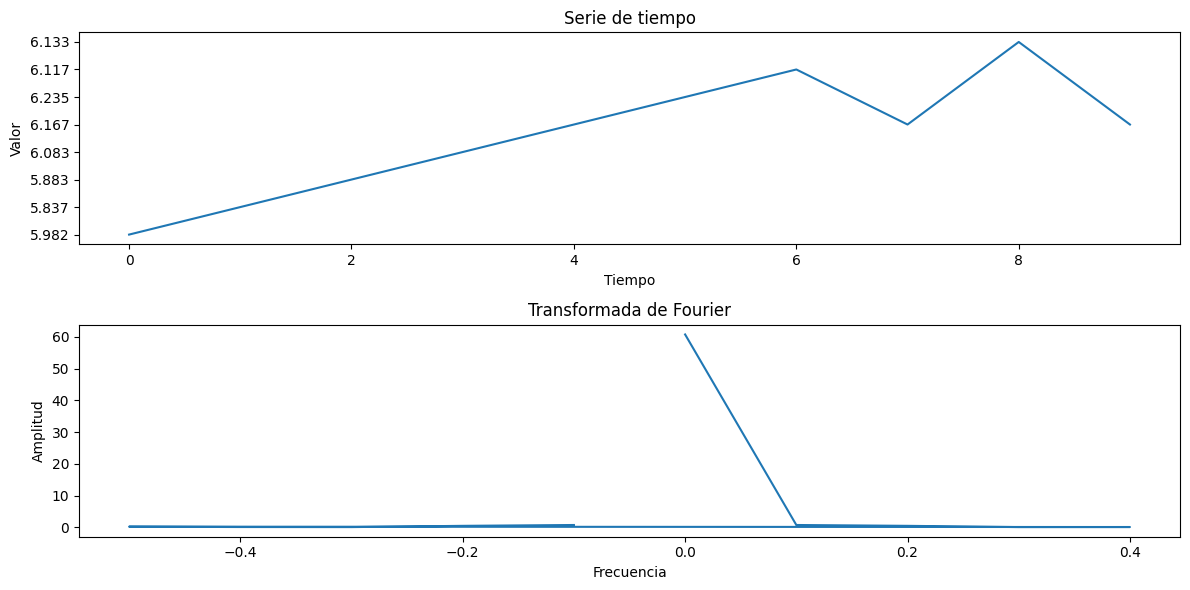

In [9]:
# Calcular la Transformada de Fourier
transformada = np.fft.fft(cierre[:10])

# Calcular las frecuencias correspondientes a los coeficientes de la transformada
frecuencias = np.fft.fftfreq(len(cierre[:10]), d=1)  # Aquí asumimos que los datos están separados por un intervalo de tiempo constante
magnitudes = np.abs(frecuencias)
# Graficar la serie de tiempo y la transformada de Fourier
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(range(len(cierre[:10])), cierre[:10])
plt.title("Serie de tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Valor")

plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(transformada))
plt.title("Transformada de Fourier")
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

C:\Users\maliera\AppData\Local\Temp\ipykernel_68188\3431455161.py:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid((2, 3), (1, 1), colspan=3)
C:\Users\maliera\AppData\Local\Temp\ipykernel_68188\3431455161.py:38: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid((2, 3), (1, 2), colspan=3)
C:\Users\maliera\AppData\Local\Temp\ipykernel_68188\3431455161.py:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid((2, 3), (0, 1), colspan=3)
C:\Users\maliera\AppData\Local\Temp\ipykernel_68188\3431455161.py:46: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is 

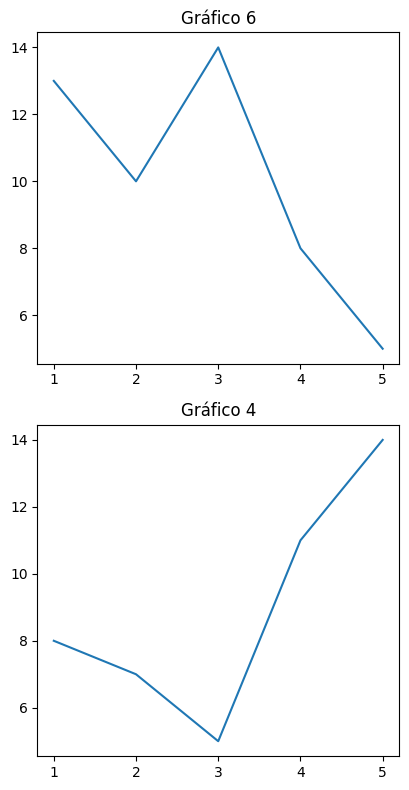

In [10]:
import matplotlib.pyplot as plt

# Datos para los gráficos
x1 = [1, 2, 3, 4, 5]
y1 = [10, 15, 7, 12, 9]

x2 = [1, 2, 3, 4, 5]
y2 = [5, 8, 12, 6, 10]

x3 = [1, 2, 3, 4, 5]
y3 = [9, 12, 6, 10, 8]

x4 = [1, 2, 3, 4, 5]
y4 = [8, 7, 5, 11, 14]

x5 = [1, 2, 3, 4, 5]
y5 = [6, 9, 11, 15, 12]

x6 = [1, 2, 3, 4, 5]
y6 = [13, 10, 14, 8, 5]

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 8))

# Ajusta el tamaño de las subtramas
plt.subplot2grid((2, 3), (0, 0), colspan=3)
plt.plot(x1, y1)
plt.title('Gráfico 1')

plt.subplot2grid((2, 3), (1, 0), colspan=3)
plt.plot(x2, y2)
plt.title('Gráfico 2')

plt.subplot2grid((2, 3), (1, 1), colspan=3)
plt.plot(x3, y3)
plt.title('Gráfico 3')

plt.subplot2grid((2, 3), (1, 2), colspan=3)
plt.plot(x4, y4)
plt.title('Gráfico 4')

plt.subplot2grid((2, 3), (0, 1), colspan=3)
plt.plot(x5, y5)
plt.title('Gráfico 5')

plt.subplot2grid((2, 3), (0, 2), colspan=3)
plt.plot(x6, y6)
plt.title('Gráfico 6')

# Ajusta el espacio entre las subtramas para evitar superposiciones
plt.tight_layout()

plt.show()


['5.982' '5.837' '5.883' '6.083' '6.167' '6.235' '6.117' '6.167' '6.133'
 '6.167']


C:\Users\maliera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


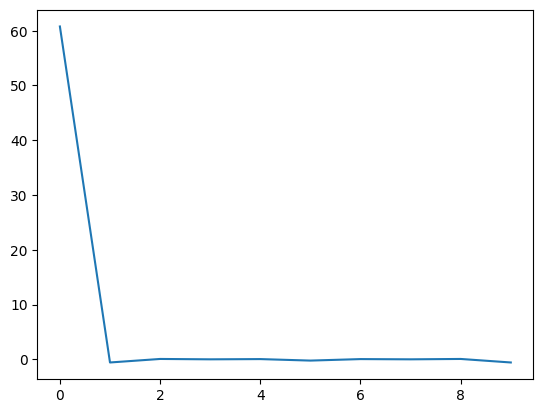

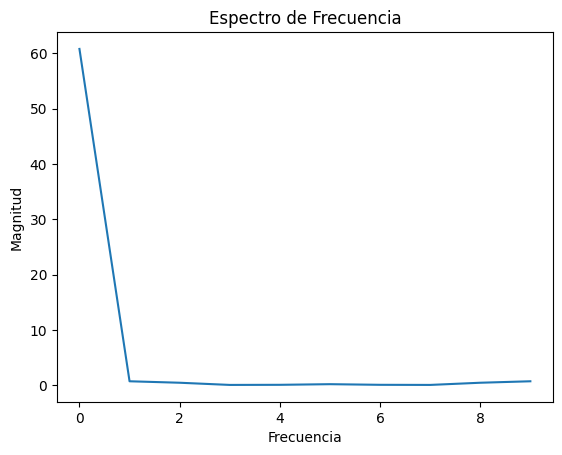

In [11]:
print(cierre[:10])
dft = np.fft.fft(cierre[:10])
# Obtén la magnitud de los coeficientes DFT
magnitud_dft = np.abs(dft)


plt.plot(dft)
plt.show()

#Representa l importancia de cada una de las frecuencias que componen a la serie de tiempo original
# Visualiza el espectro de frecuencia
plt.plot(magnitud_dft)
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.show()
